<a href="https://colab.research.google.com/github/essiesalari/Mall-Customers-ML/blob/main/Mall%20Customers%20ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customers ML Project**

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Clone the GitHub repository
!git clone https://github.com/essiesalari/Mall-Customers-ML

%cd Mall-Customers-ML

!unzip Mall_Customers.zip

Cloning into 'Mall-Customers-ML'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 13), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 86.77 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/Mall-Customers-ML
Archive:  Mall_Customers.zip
  inflating: Mall_Customers.csv      


In [3]:
# Read the data into Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


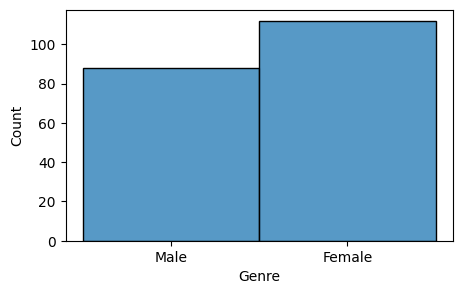

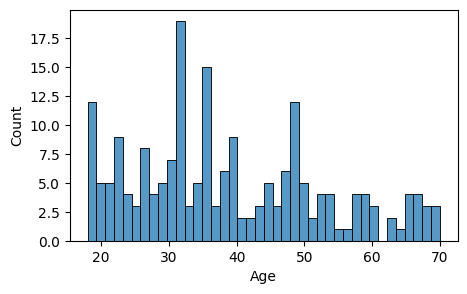

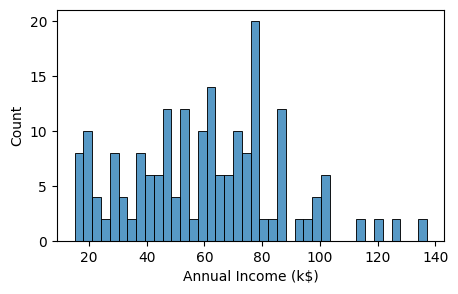

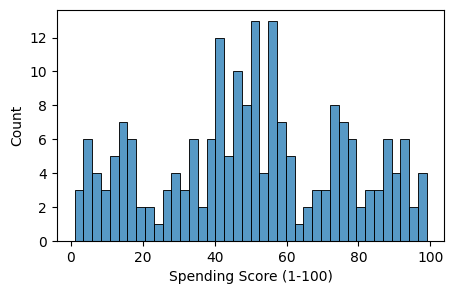

In [6]:
features = ['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']

for feature in features:
  plt.figure(figsize=(5,3))
  sns.histplot(data=df[feature], bins=40)
  plt.show()

## Correlations

<ipython-input-7-361e19bff1e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


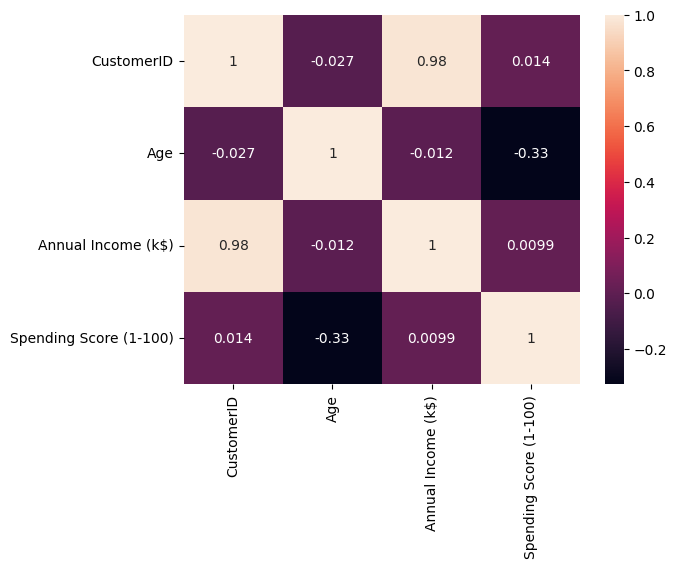

In [7]:
# Visualaize the correlations
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True);

## Preprocessing

In [8]:
# Drop Unnessesary Columns
df_encode = df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

# Encode Categorical Fields
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encode['Genre'] = le.fit_transform(df_encode['Genre'])
df_encode

<ipython-input-8-421dc820198b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['Genre'] = le.fit_transform(df_encode['Genre'])


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [9]:
# Handel Outliers
from scipy import stats
threshold = 3
for col in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
  z_score = stats.zscore(df_encode[col])
  outliers = np.abs(z_score) > threshold
  print(f'# outliers in {col}: {outliers.sum()}')

# outliers in Age: 0
# outliers in Annual Income (k$): 0
# outliers in Spending Score (1-100): 0


## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_enco_scl = sc.fit_transform(df_encode)

## ML Models

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture


In [24]:
def random_search_clustering(model, param_distributions, X):
    # Define the scorer
    scorer = make_scorer(silhouette_score)

    # Perform the random search
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, scoring=scorer, n_jobs=-1, cv=3, random_state=42)
    random_search.fit(X)

    # Return the best parameters
    return random_search.best_params_

In [ ]:
models = {
    'KMeans': KMeans(),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(),
    'GaussianMixture': GaussianMixture()
}

for model_name, model in models.items():
    best_params = random_search_clustering(model, param_distributions[model_name], df_enco_scl)
    print(f"Best parameters for {model_name}: {best_params}")

In [29]:
from sklearn.metrics import silhouette_score

# Assume best_params is a dictionary containing the best parameters for each model
best_params = {
    'KMeans': {'n_clusters': 2},
    'AgglomerativeClustering': {'n_clusters': 2},
    'DBSCAN': {'eps': 0.437, 'min_samples': 9},
    'MeanShift': {'bandwidth':  0.437},
    'SpectralClustering': {'n_clusters': 2},
    'GaussianMixture': {'n_components': 2}
}

for model_name, model in models.items():
    # Set the best parameters
    model.set_params(**best_params[model_name])

    # Fit the model and predict the labels
    model.fit(df_enco_scl)
    if hasattr(model, 'predict'):
        labels = model.predict(df_enco_scl)
    else:
        labels = model.labels_

    # Calculate the silhouette score
    score = silhouette_score(df_enco_scl, labels)

    print(f"Silhouette score for {model_name}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for KMeans: 0.2518152915788437
Silhouette score for AgglomerativeClustering: 0.24177953745462927
Silhouette score for DBSCAN: -0.0008601580523302754
Silhouette score for MeanShift: 0.2679785263333473
Silhouette score for SpectralClustering: 0.2776035125578272
Silhouette score for GaussianMixture: 0.24552487755394123


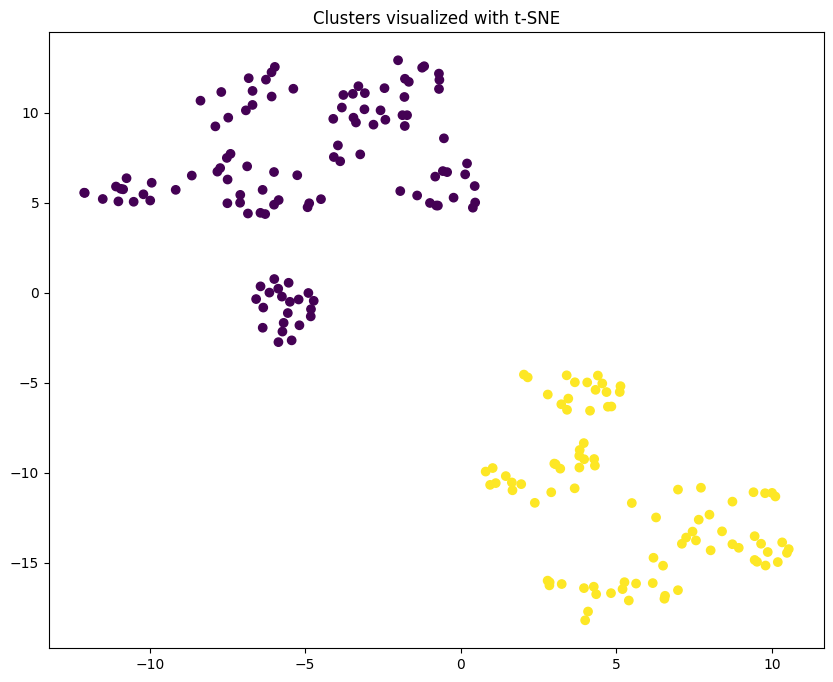

In [31]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assume best_params is a dictionary containing the best parameters for each model
best_params = {
    'SpectralClustering': {'n_clusters': 2}
}

# Fit the SpectralClustering model and predict the labels
model = SpectralClustering(n_clusters=best_params['SpectralClustering']['n_clusters'])
model.fit(df_enco_scl)
labels = model.labels_

tsne = TSNE(n_components=2, random_state=42)
df_enco_scl_tsne = tsne.fit_transform(df_enco_scl)

plt.figure(figsize=(10, 8))
plt.scatter(df_enco_scl_tsne[:, 0], df_enco_scl_tsne[:, 1], c=labels, cmap='viridis')
plt.title('Clusters visualized with t-SNE')
plt.show()
